In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base() 
# reflect the tables
Base.prepare(engine, reflect= True)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Station= Base.classes.station
Measurement= Base.classes.measurement


In [13]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [53]:
# Find the most recent date in the data set.
most_recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [97]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
start_date= dt.datetime(2017,8,23)- dt.timedelta(days=365)
start_date

# Perform a query to retrieve the data and precipitation scores
prcp_filter= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df= pd.DataFrame(prcp_filter, columns=['Date','Precipitation'])
precipitation_df=precipitation_df.dropna(how='any')

# Sort the dataframe by date
precipitation_df= precipitation_df.sort_values("Date")
precipitation_df=precipitation_df.set_index('Date')
precipitation_df


,Precipitation
Date,
2016-08-24,0.08
2016-08-24,1.22
2016-08-24,2.28
2016-08-24,1.45
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


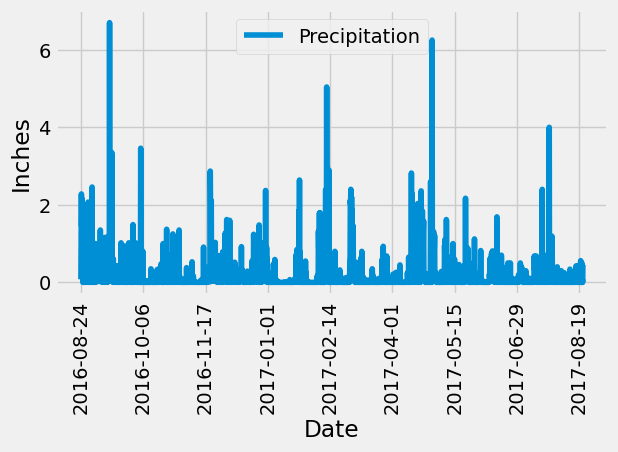

In [112]:
# Use Pandas Plotting with Matplotlib to plot the data

    #precipitation.plot(x="date",y="prcp")
    #plt.xticks(precipitation['Date'], rotation='vertical')
    #plt.xlabel('Date')
    #plt.ylabel('Precipitation (Inches)')
    #plt.locator_params(axis='x', nbins=6)
precipitation_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [71]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [94]:
# Design a query to calculate the total number of stations in the dataset
stations=session.query(Station.id).count()
stations
#session.query(Station).all()

9

In [84]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel=[Measurement.station, func.count(Measurement.station)]
active_stations= session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [95]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
as_id= active_stations[0][0]
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), 
              func.avg(Measurement.tobs)).filter(Measurement.station==as_id).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

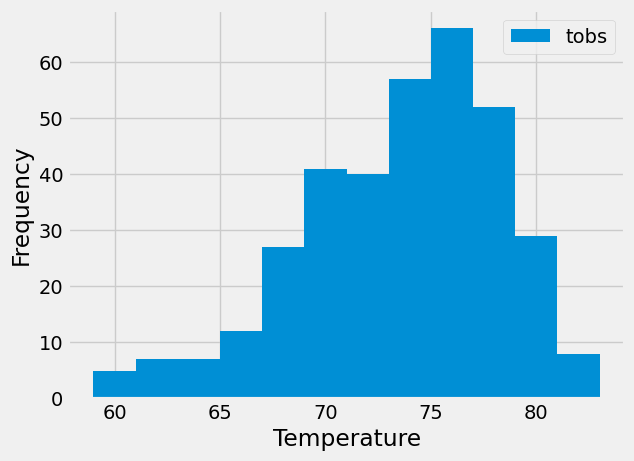

In [111]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station

temp_obs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= '2016-08-24').\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.station ==as_id).all()
temp_obs_df= pd.DataFrame(temp_obs)
temp_obs_df
# Plot the results as a histogram
temp_obs_df.plot.hist(bins=12)
plt.xlabel('Temperature')

#filter(Measurement.date >= start_date).\
#filter(Measurement.date <= most_recent_date).\
#plt.show()

# Close Session

In [110]:
# Close Session
session.close()